In [6]:
Importing all neccessary packagesimport librosa
import pandas as pd
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import os
from glob import glob
import cv2
import matplotlib.pyplot as plt
import skimage.io

In [16]:
train_data = pd.read_csv('Train_Data.csv')
print(train_data.head())
print(f"Train: {train_data.shape}")

            FileName         Class
0  1-E1-Major 00.wav  Sound_Guitar
1  1-E1-Major 01.wav  Sound_Guitar
2  1-E1-Major 02.wav  Sound_Guitar
3  1-E1-Major 03.wav  Sound_Guitar
4  1-E1-Major 04.wav  Sound_Guitar
Train: (2628, 2)


In [17]:
# trim function to get 1s of audio data
def trim_audio(af, sr):
    if(af.shape[0]<=2*sr):
        af_trimmed = af[-sr:]
    else:
        mid = int(af.shape[0]/2)
        af_trimmed = af[mid:mid+sr]
        
    return af_trimmed    

In [18]:
classes = train_data['Class'].unique()
print(classes)

# Get one file from each class
files = []

for class_name in classes:
    class_files = train_data[train_data['Class'] == class_name]
    files.append(class_files['FileName'].iloc[0])

print(files)

['Sound_Guitar' 'Sound_Drum' 'Sound_Piano' 'Sound_Violin']
['1-E1-Major 00.wav', '04-47367.wav', '029500_morning-rain-piano-65875.wav', '0_emil-telmanyi_bwv1001.wav']


PLOTTING SAMPLE AUDIO DATA FOR EACH INSTRUMENT


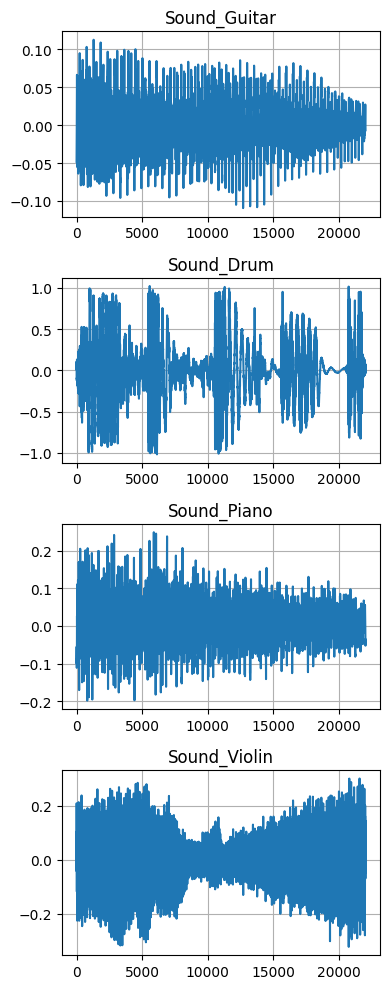

In [19]:
print("PLOTTING SAMPLE AUDIO DATA FOR EACH INSTRUMENT")
fig, axs = plt.subplots(4, 1, figsize = (4, 10))

for i in range(4):
    file_path = os.path.join('Train_audios', files[i])

    af, sr = librosa.load(file_path)
    af = trim_audio(af, sr)

    ax = axs[i]

    ax.plot(af)
    ax.set_title(classes[i])
    ax.grid()

plt.tight_layout()
plt.show()

In [22]:
# scaling audio data to standard image pixel value size
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

In [23]:
# retrieval of spectrogram from file path
def get_spectrogram(file_path):
    af, sr = librosa.load(file_path)

    # trim audio file to get 1s of audio data
    af_trimmed = trim_audio(af, sr)
    
    # convert to spectrogram
    img = librosa.feature.melspectrogram(y=af_trimmed, sr=sr, n_mels=128*2,)
    img = librosa.amplitude_to_db(img)
    
    return img

In [28]:
# converts all audio files in a directory to images of spectrograms
# and stores them in destination directory
#  return final image, fft and corresponding class
def convert_audio_files_to_spectrograms(source_dir, destination_dir, data_file):
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)    

    img_list = []
    class_list = []

    df = pd.DataFrame(data_file)
    print(data_file.head())
    
    for i, row in df.iterrows():
        if(i%50 == 0):
            print("Converting file:", i+1)
        
        source_file = os.path.join(source_dir, row['FileName'])
        class_name = row['Class']
        
        img = get_spectrogram(source_file)
        
        destination_file = os.path.join(destination_dir, row['FileName'][:-3]+'png')
        
        img = scale_minmax(img, 0, 255).astype(np.uint8)
        
        img_list.append(img)
        class_list.append(class_name)
        
        skimage.io.imsave(destination_file, img)     # saves images in grayscale     

    img_list = np.array(img_list)
    class_list = np.array(class_list)
    
    return img_list, class_list

In [29]:
img_list, class_list = convert_audio_files_to_spectrograms('Train_audios', 'Train_specs', train_data)

            FileName         Class
0  1-E1-Major 00.wav  Sound_Guitar
1  1-E1-Major 01.wav  Sound_Guitar
2  1-E1-Major 02.wav  Sound_Guitar
3  1-E1-Major 03.wav  Sound_Guitar
4  1-E1-Major 04.wav  Sound_Guitar
Converting file: 1
Converting file: 51
Converting file: 101
Converting file: 151
Converting file: 201
Converting file: 251
Converting file: 301
Converting file: 351
Converting file: 401
Converting file: 451
Converting file: 501
Converting file: 551
Converting file: 601
Converting file: 651
Converting file: 701


C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\808-d3-38858.png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale


Converting file: 751
Converting file: 801
Converting file: 851


C:\Users\range\AppData\Local\Temp\ipykernel_23328\167187684.py:3: RuntimeWarning: invalid value encountered in divide
  X_std = (X - X.min()) / (X.max() - X.min())
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:25: RuntimeWarning: invalid value encountered in cast
  img = scale_minmax(img, 0, 255).astype(np.uint8)
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\kick-drum-f-14574.png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale


Converting file: 901
Converting file: 951
Converting file: 1001


C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_39KD (119).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale


Converting file: 1051


C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_39KD (32).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_39KD (37).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_39KD (40).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_39KD (44).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_39KD (5).png is a low contra

Converting file: 1101


C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_39KD (73).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_39KD (77).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_39KD (92).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_43HH (103).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_43HH (105).png is a low con

Converting file: 1151


C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_43HH (12).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_43HH (122).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_43HH (126).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_43HH (130).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_43HH (131).png is a low c

Converting file: 1201


C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_43HH (4).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_43HH (40).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_43HH (47).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_43HH (61).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_43HH (62).png is a low contra

Converting file: 1251


C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_43HH (9).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_45SD (100).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_45SD (102).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_45SD (106).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_45SD (112).png is a low co

Converting file: 1301


C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_45SD (130).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_45SD (134).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_45SD (17).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_45SD (19).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale
C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_45SD (21).png is a low con

Converting file: 1351


C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\WaveDrum02_45SD (6).png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale


Converting file: 1401
Converting file: 1451


C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\realizations-or-fighting-70370.png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale


Converting file: 1501
Converting file: 1551
Converting file: 1601
Converting file: 1651
Converting file: 1701
Converting file: 1751
Converting file: 1801
Converting file: 1851
Converting file: 1901
Converting file: 1951


C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\14_ray-chen_bwv1004_mov5.png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale


Converting file: 2001
Converting file: 2051


C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\2_oliver-colbentson_bwv1006_mov7.png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale


Converting file: 2101


C:\Users\range\AppData\Local\Temp\ipykernel_23328\2917422945.py:30: UserWarning: Train_specs\9_kinga-augustyn_bwv1005_mov2.png is a low contrast image
  skimage.io.imsave(destination_file, img)     # saves images in grayscale


Converting file: 2151
Converting file: 2201
Converting file: 2251
Converting file: 2301
Converting file: 2351
Converting file: 2401
Converting file: 2451
Converting file: 2501
Converting file: 2551
Converting file: 2601


In [31]:
test_data = pd.read_csv('Test_Data.csv')
_, _ = convert_audio_files_to_spectrograms('Test_audios', 'Test_specs', test_data)

                         FileName         Class
0  acoustic-guitar-logo-13084.wav  Sound_Guitar
1         guitar-chords-70663.wav  Sound_Guitar
2         guitar-intro-110935.wav  Sound_Guitar
3           guitar-solo-27194.wav  Sound_Guitar
4            guitar-solo-5999.wav  Sound_Guitar
Converting file: 1
Converting file: 51


In [32]:
print("Mel Spectrogram list shape:", img_list.shape)

Mel Spectrogram list shape: (2628, 256, 44)


In [39]:
def show_random_images(img_list, class_list):

    rows = 5
    cols = 6

    fig, ax = plt.subplots(rows, cols, figsize = (15, 25))
    
    titles = []
    for i in range(1, rows*cols+1):
        img = img_list[i*80]
        titles.append(class_list[i*80])
        
        fig.add_subplot(rows, cols, i)
        plt.imshow(img)
        
    for i in range(rows):
        for j in range(cols):
            ax[i, j].set_title(titles[i*cols + j])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
    
    plt.show

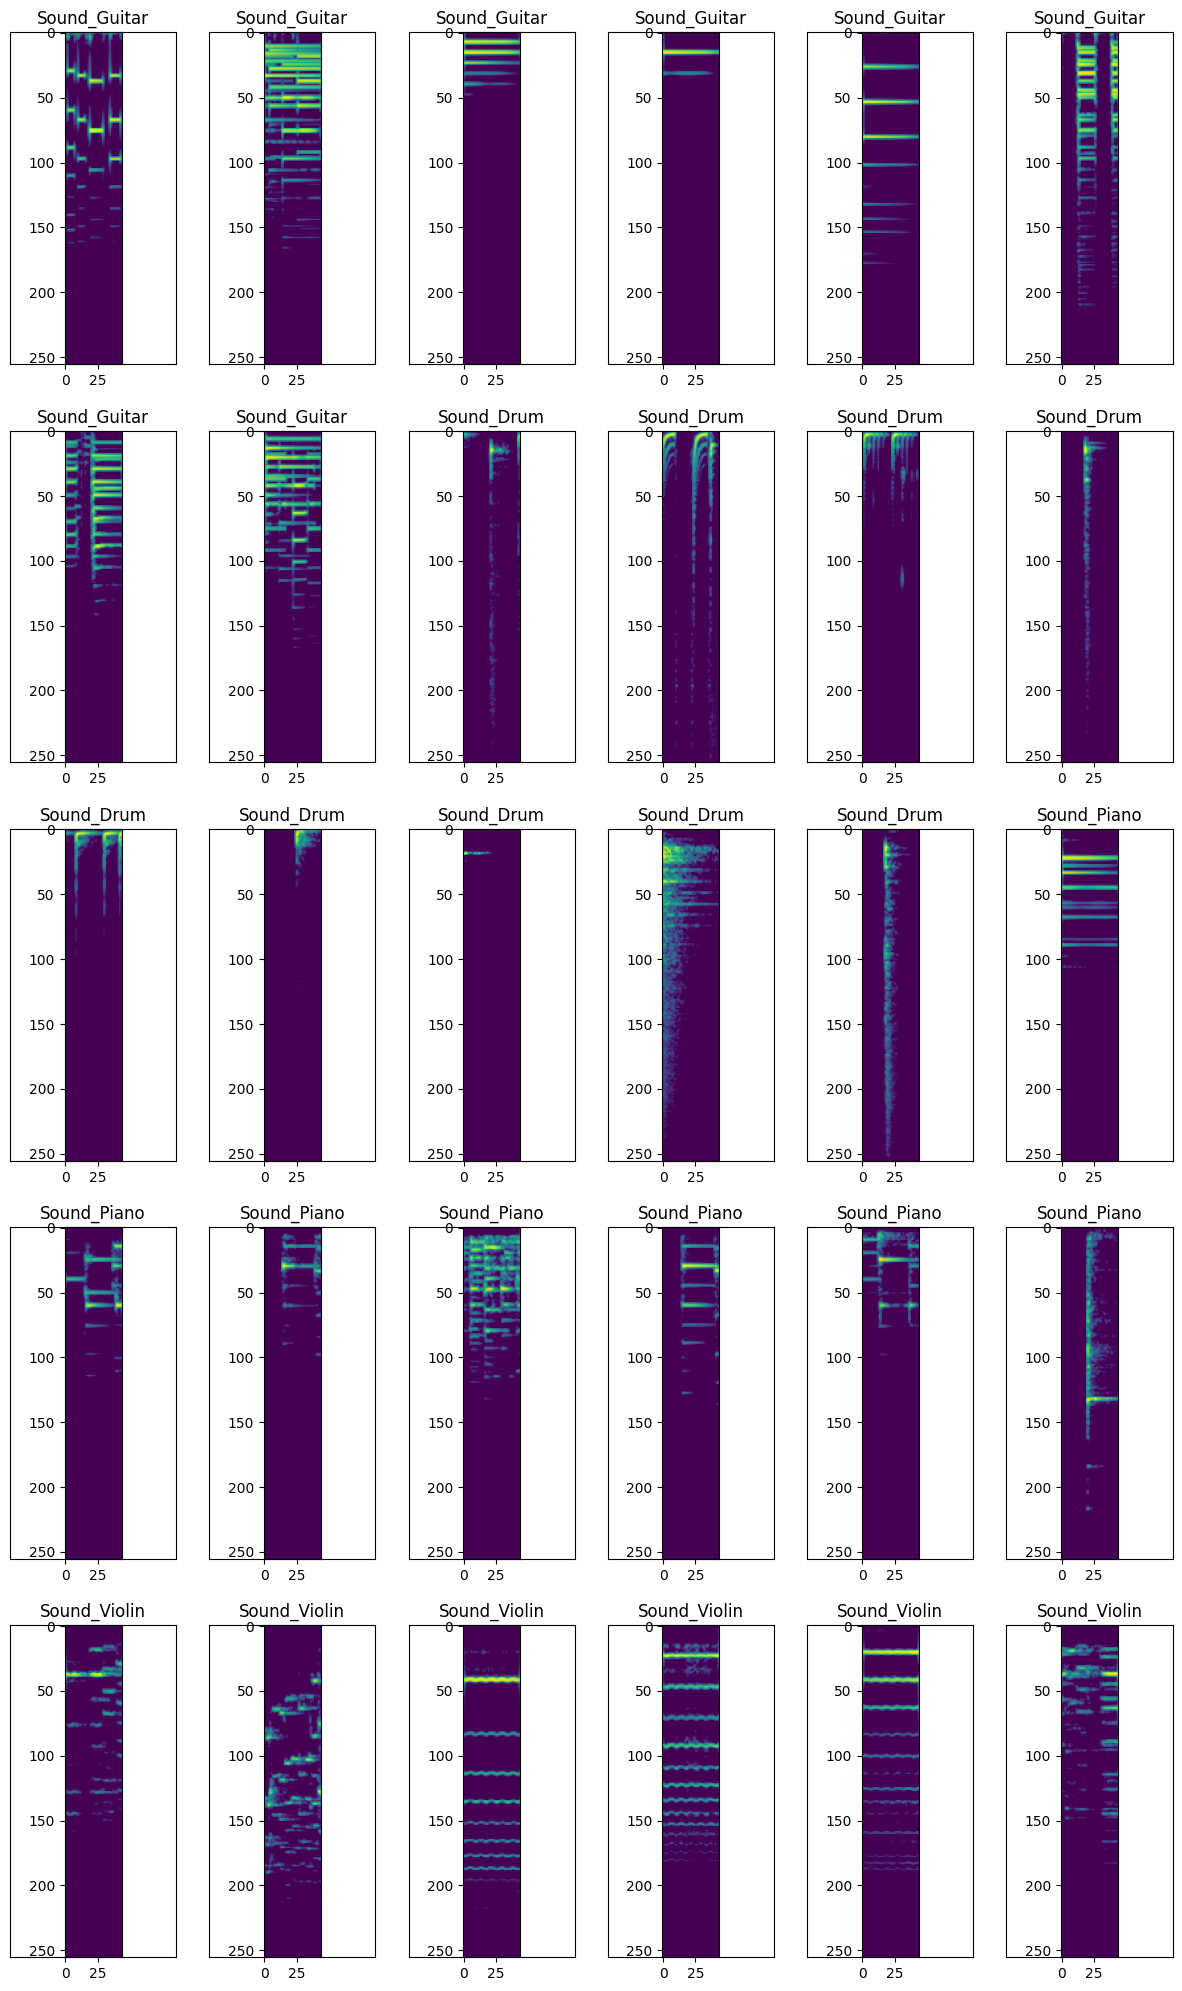

In [40]:
show_random_images(img_list, class_list)